# Datasources
Python Notebook for exploring and analyzing the datasources used in this project

## Setup
### Install Dependencies

In [2]:
%pip install pandas
%pip install matplotlib
%pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Import Packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Datasource1: Charging Infrastructure

### Load and Clean the Data

In [43]:
data_path = 'https://www.bundesnetzagentur.de/SharedDocs/Downloads/DE/Sachgebiete/Energie/Unternehmen_Institutionen/E_Mobilitaet/Ladesaeuleninfrastruktur.xlsx?__blob=publicationFile'

# Load the excel sheet
ds1 = pd.read_excel(data_path,
                    sheet_name='4.1 Ladepunkte je BL',
                    header=[6, 7],
                    index_col=4)

# Drop unimportant rows and columns
ds1 = ds1.iloc[:-1, 4:]

# Assign index and column names
ds1.columns.names = ['Date', 'Type']
ds1.index.name = 'State'

# Overview of the cleaned table
ds1

Date                   2017-01-01                2017-04-01                  
Type                          NLP    SLP  gesamt        NLP    SLP  gesamt   
State                                                                        
Baden-Württemberg           701.0  140.0   841.0      752.0  160.0   912.0  \
Bayern                     1348.0  156.0  1504.0     1504.0  171.0  1675.0   
Berlin                      493.0   16.0   509.0      520.0   20.0   540.0   
Brandenburg                  38.0    6.0    44.0       39.0    8.0    47.0   
Bremen                        8.0    0.0     8.0       16.0    0.0    16.0   
Hamburg                     315.0   13.0   328.0      378.0   18.0   396.0   
Hessen                      366.0   45.0   411.0      419.0   45.0   464.0   
Mecklenburg-Vorpommern       58.0   10.0    68.0       58.0   10.0    68.0   
Niedersachsen               496.0   57.0   553.0      522.0   63.0   585.0   
Nordrhein-Westfalen        1275.0   48.0  1323.0     1361.0   50.0  1411.0   
Rheinland-Pfalz             177.0   28.0   205.0      188.0   30.0   218.0   
Saarland                     16.0    0.0    16.0       18.0    0.0    18.0   
Sachsen                     197.0   12.0   209.0      206.0   12.0   218.0   
Sachsen-Anhalt               52.0   32.0    84.0       57.0   34.0    91.0   
Schleswig-Holstein          233.0   26.0   259.0      328.0   31.0   359.0   
Thüringen                    91.0   21.0   112.0      116.0   25.0   141.0   
Summe                      5864.0  610.0  6474.0     6482.0  677.0  7159.0   

Date                   2017-07-01                2017-10-01  ... 2022-04-01   
Type                          NLP    SLP  gesamt        NLP  ...     gesamt   
State                                                        ...              
Baden-Württemberg           781.0  177.0   958.0      875.0  ...    11042.0  \
Bayern                     1613.0  188.0  1801.0     1866.0  ...    13711.0   
Berlin                      547.0   20.0   567.0      595.0  ...     1987.0   
Brandenburg                  50.0    8.0    58.0       68.0  ...     1413.0   
Bremen                       44.0    0.0    44.0       65.0  ...      416.0   
Hamburg                     428.0   24.0   452.0      548.0  ...     1686.0   
Hessen                      493.0   62.0   555.0      598.0  ...     5008.0   
Mecklenburg-Vorpommern       62.0   15.0    77.0       84.0  ...      802.0   
Niedersachsen               651.0   80.0   731.0      747.0  ...     6513.0   
Nordrhein-Westfalen        1439.0   60.0  1499.0     1528.0  ...    11561.0   
Rheinland-Pfalz             201.0   32.0   233.0      237.0  ...     2498.0   
Saarland                     18.0    0.0    18.0       28.0  ...      555.0   
Sachsen                     212.0   22.0   234.0      229.0  ...     2657.0   
Sachsen-Anhalt               69.0   39.0   108.0       95.0  ...     1123.0   
Schleswig-Holstein          365.0   35.0   400.0      409.0  ...     2837.0   
Thüringen                   132.0   31.0   163.0      199.0  ...     1290.0   
Summe                      7105.0  793.0  7898.0     8171.0  ...    65099.0   

Date                   2022-07-01                   2022-10-01            
Type                          NLP      SLP   gesamt        NLP      SLP   
State                                                                     
Baden-Württemberg         10207.0   1698.0  11905.0    11171.0   1872.0  \
Bayern                    12629.0   1963.0  14592.0    13361.0   2177.0   
Berlin                     1785.0    248.0   2033.0     1774.0    263.0   
Brandenburg                1203.0    300.0   1503.0     1256.0    325.0   
Bremen                      390.0     54.0    444.0      409.0     58.0   
Hamburg                    1567.0    224.0   1791.0     1630.0    249.0   
Hessen                     4680.0    713.0   5393.0     5041.0    788.0   
Mecklenburg-Vorpommern      683.0    179.0    862.0      726.0    214.0   
Niedersachsen              5750.0

### Visualize the Data

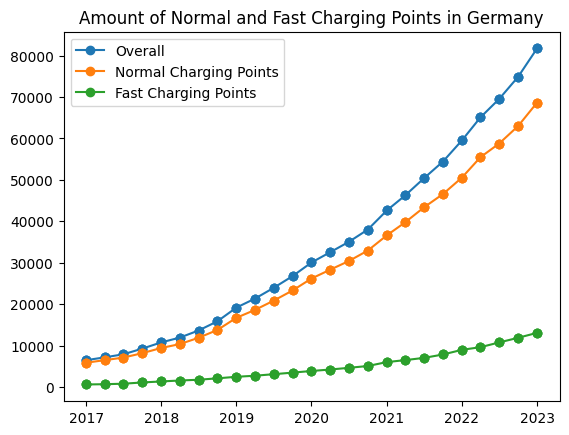

In [89]:
ds_v = ds1.loc['Summe']
dates = list(map(lambda i: i[0], ds_v.index))
gesamt = [ds_v[(date, 'gesamt')] for date in dates]
nlp = [ds_v[(date, 'NLP')] for date in dates]
slp = [ds_v[(date, 'SLP')] for date in dates]

plt.plot(dates, gesamt, 'o-', dates, nlp, 'o-', dates, slp, 'o-')
plt.legend(['Overall', 'Normal Charging Points', 'Fast Charging Points'])
plt.title('Amount of Normal and Fast Charging Points in Germany')
plt.show()

## Datasource2.1: New Registrations of Motor Vehicles with Alternative Drive Systems over Time

### Load and Clean the Data

In [5]:
data_path = 'https://www.kba.de/SharedDocs/Downloads/DE/Statistik/Fahrzeuge/FZ28/fz28_2023_03.xlsx?__blob=publicationFile'

# Load the excel sheet
ds2_1 = pd.read_excel(data_path,
                      sheet_name='FZ 28.2',
                      header=None,
                      index_col=1)

# Drop unimportant rows and columns
# Note: Just use the colums for electric cars and Plug-in-Hybrids because just that are 
# important for correlating with the charging infrastructure
ds2_1 = ds2_1.iloc[12:107, [1, 6, 8]]

# Rename the columns
ds2_1.columns = ['Overall', 'Electric', 'Hybrid (Plug-in)']

# Just take the rows for the annual amounts
ds2_1 = ds2_1.loc[list(filter(lambda i: 'Jahr' in i,  ds2_1.index))]

# Rename the index values 
ds2_1.index = pd.Index(map(lambda i: int(i.split(' ')[1]), ds2_1.index))
ds2_1.index.name = 'Year'

# Drop year 2023
ds2_1 = ds2_1.drop(2023)

# Overview of the cleaned table
ds2_1

,Overall,Electric,Hybrid (Plug-in)
Year,,,
2022,2651357,470559,362093
2021,2622132,355961,325449
2020,2917678,194163,200469
2019,3607258,63281,45348
2018,3435778,36062,31442
2017,3441262,25056,29436
2016,3351607,11410,13744


### Visualize the Data

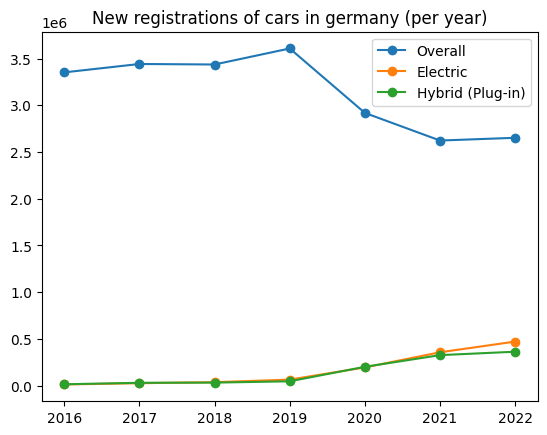

In [7]:
plt.plot(ds2_1, 'o-')
plt.title('New registrations of cars in germany (per year)')
plt.legend(ds2_1.columns)
plt.show()

## Datasource2.2: New Registrations of Motor Vehivles with Alternative Drive Systems by German States

### Load and Clean the Data

In [8]:
year = 2022
data_path = f'https://www.kba.de/SharedDocs/Downloads/DE/Statistik/Fahrzeuge/FZ28/fz28_{year}_12.xlsx?__blob=publicationFile'

# Load the excel sheet
ds2_1 = pd.read_excel(data_path,
                      sheet_name='FZ 28.9',
                      header=None,
                      index_col=1)

# Drop unimportant rows and columns
ds2_1 = ds2_1.iloc[30:47, [1, 6, 8]]

# Rename the columns
ds2_1.columns = ['Overall', 'Electric', 'Hybrid (Plug-in)']

# Rename the first index value
ds2_1.index.values[0] = 'Gesamt'

# Assign index name
ds2_1.index.name = 'State'

# Overview of the cleaned table
ds2_1

,Overall,Electric,Hybrid (Plug-in)
State,,,
Gesamt,2651357,470559,362093
Baden-Württemberg,367051,71328,57578
Bayern,549542,95766,70099
Berlin,66204,10479,9344
Brandenburg,49331,8164,6346
Bremen,15665,2459,2258
Hamburg,84411,9149,10976
Hessen,279749,47846,40283
Mecklenburg-Vorpommern,27668,3883,2785


### Define Dictionary with the offical Abbrevations for the German States
based on https://www.datenportal.bmbf.de/portal/de/G122.html

In [61]:
country_code = {
    'Baden-Württemberg': 'BW',
    'Bayern': 'BY',
    'Berlin': 'BE',
    'Brandenburg': 'BB',
    'Bremen':'HB',
    'Hamburg':'HH',
    'Hessen':'HE',
    'Mecklenburg-Vorpommern':'MV',
    'Niedersachsen':'NI',
    'Nordrhein-Westfalen':'NW',
    'Rheinland-Pfalz':'RP',
    'Saarland':'SL',
    'Sachsen':'SN',
    'Sachsen-Anhalt':'ST',
    'Schleswig-Holstein':'SH',
    'Thüringen':'TH'
}

### Visualize the Data

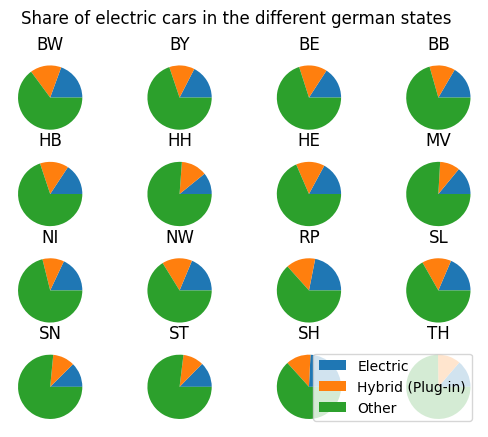

In [62]:
#plt.pie(ds2_1['ELectric','Bayern'])
#plt.show()
ds2_1['Other'] = ds2_1['Overall'] - ds2_1['Electric'] - ds2_1['Hybrid (Plug-in)']

for i, state in enumerate(ds2_1.index[1:]):
    plt.subplot(4, 4, i+1)
    plt.pie(ds2_1.loc[state, ['Electric','Hybrid (Plug-in)','Other']])
    plt.title(country_code[state])

plt.legend(['Electric','Hybrid (Plug-in)','Other'], loc='upper right')
plt.suptitle('Share of electric cars in the different german states')
plt.show()

## Datasource3: German States with Capitals by Area, Population and Population Density

### Load and Clean the Data
From this data source, we are only interested in the area for the states, so the other columns and rows are gonna be cleaned out

In [84]:
data_path = 'https://www.destatis.de/DE/Themen/Laender-Regionen/Regionales/Gemeindeverzeichnis/Administrativ/02-bundeslaender.xlsx?__blob=publicationFile'

# Load the excel sheet
ds3 = pd.read_excel(data_path,
                    sheet_name='Bundesländer_mit_Hauptstädten',
                    usecols=[0,2],
                    header=None,
                    index_col=None)

# Drop unimportant rows
ds3 = ds3.iloc[7:-16]

# Rename the columns
ds3.columns = ['State', 'Area']

# Remove the number from each state name
ds3['State'] = ds3['State'].apply(lambda x: x[4:] if type(x) is str else x)

# 
ds3.iloc[-1, 0] = 'Gesamt'

# Drop the rows which contain NaN (= rows for the states capitals)
ds3 = ds3.dropna()

# Set the State column as the index
ds3.set_index('State', inplace=True)

# Overview of the cleaned table
ds3

,Area
State,
Schleswig-Holstein,15804.3
Hamburg,755.09
Niedersachsen,47709.86
Bremen,419.37
Nordrhein-Westfalen,34112.61
Hessen,21115.63
Rheinland-Pfalz,19857.97
Baden-Württemberg,35747.85
Bayern,70541.58


### Visualize the Data

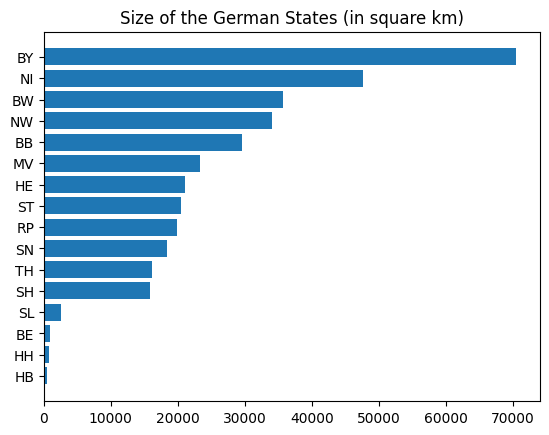

In [85]:
ds_v = ds3.sort_values(by='Area', ascending=True)
ds_v = ds_v.drop(index='Gesamt')
ds_v['Label'] = [country_code[state] for state in ds_v.index]

plt.barh(ds_v['Label'], ds_v['Area'])
plt.title('Size of the German States (in square km)')
plt.show()